#Модель KNN

In [ ]:
import numpy as np


def base_metr(x : np.ndarray, y : np.ndarray) -> float:
  r = (y - x)**2
  return np.sqrt(r.sum())

class KNN:
  def main_func(self, x):
    distance = []
    for i in range(self.clStorage.sz):
      distance.append(
          [self.metric(x, self.clStorage.learn_feature[i]),
                          self.clStorage.learn_target[i]]
          )
    distance.sort()
    return distance[: self.K]

  class Storage:
    def __init__(self, X: np.ndarray, y : np.ndarray):
      self.learn_feature = X
      self.learn_target = y
      self.sz = X.shape[0]

  def __init__(self, K = 2 , metric = base_metr):
    self.K = K
    self.metric = metric

  def fit(self, X : np.ndarray, y: np.ndarray):
    assert X.shape[0] == y.shape[0]
    self.clStorage = self.Storage(X,y)

class KNNClassifier(KNN):

   def __init__(self, K, metric  = base_metr):
     super().__init__(K, metric)

   def moda(self, x):
    return ( max(set(x), key = x.count) )

   def predict(self, X: np.ndarray):
    tmp_sz = X.shape[0]
    pred_X = np.zeros(tmp_sz)
    for i in range(tmp_sz):
      tmp_arr = self.main_func(X[i])
      need_arr = [i[1] for i in tmp_arr]
      pred_X[i] = self.moda(need_arr)
    return pred_X

class KNNRegressor(KNN):

    def __init__(self, K = 2, metric = base_metr):
      super().__init__(K, metric)

    def counter(self, x):
      return sum(x) / self.K

    def predict(self, X) -> np.ndarray:
      tmp_sz = X.shape[0]
      pred_X = np.zeros(tmp_sz)
      for i in range(tmp_sz):
        tmp_arr = self.main_func(X[i])
        need_arr = [i[1] for i in tmp_arr]
        pred_X[i] = self.counter(need_arr)

      return pred_X



#Selection for Reression

In [ ]:
from sklearn.model_selection import train_test_split

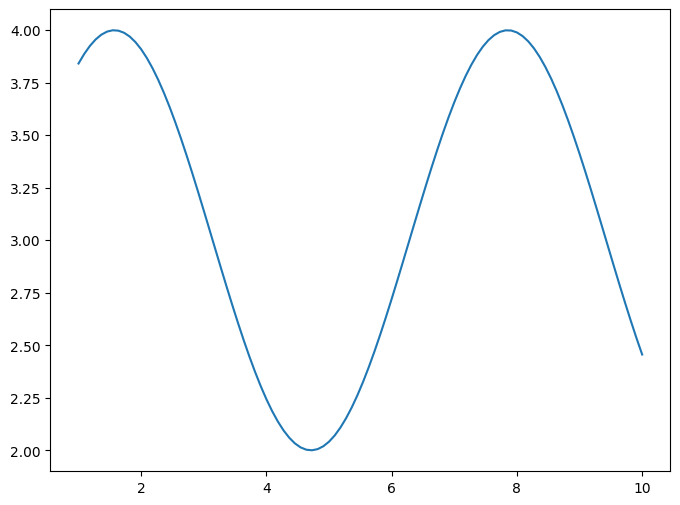

In [ ]:
import matplotlib.pyplot as plt
from random import randint

def f(x):
  return np.sin(x) + 3
X_reg = np.linspace(1,10,100)
y_reg = f(X_reg)

plt.figure(figsize = (8,6))
plt.plot(X_reg, y_reg)
plt.show()


In [ ]:
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_reg, y_reg, test_size=0.3,
                                                    random_state=42, shuffle = True)
X_train_rg.shape

(70,)

In [ ]:
X_train_rg.shape

(70,)

In [ ]:
model_1 = KNNRegressor(K = 3)
model_1.fit(X_train_rg, y_train_rg)

###Mse for regression

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_rg = model_1.predict(X_test_rg)

mse = mean_squared_error(y_test_rg, y_pred_rg)

mse

0.0017476977399018398

#Selection for Classification

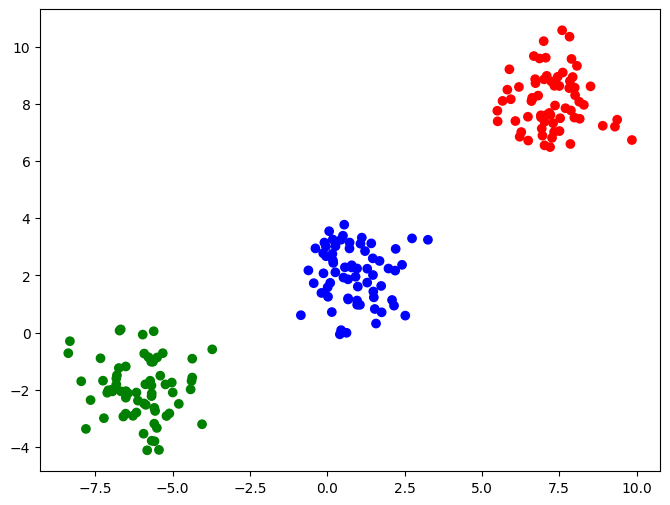

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X_cl, y_cl = make_blobs(200, 3, centers = [[1,2], [7,8], [-6,-2]], cluster_std = 1)

color = ["blue", "red", "green"]
y_color_cl = np.zeros(y_cl.size, dtype = str)

for i in [0,1,2]:
  y_color_cl[ y_cl.ravel() == i] = color[i]


plt.figure(figsize = (8,6))

plt.scatter(X_cl[:,0], X_cl[:,1], c = y_color_cl)

plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl, test_size=0.3,
                                                    random_state=42, shuffle = True)
X_train.shape, type(X_train)

((140, 2), numpy.ndarray)

In [ ]:
model_2 = KNNClassifier(3)

In [ ]:
model_2.fit(X_train, y_train)

###Accuracy for classification

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model_2.predict(X_test)

result_for_classification = accuracy_score(y_test, y_pred)

result_for_classification, y_pred, y_test

(1.0,
 array([2., 1., 2., 1., 0., 0., 1., 2., 1., 2., 2., 2., 0., 1., 2., 1., 1.,
        1., 2., 1., 1., 1., 2., 1., 2., 2., 0., 1., 0., 1., 2., 1., 2., 2.,
        1., 0., 0., 0., 1., 2., 1., 0., 1., 1., 1., 0., 1., 1., 1., 2., 1.,
        2., 0., 1., 0., 0., 2., 0., 2., 1.]),
 array([2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1]))